<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-и-обзор-данных" data-toc-modified-id="Подготовка-и-обзор-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка и обзор данных</a></span><ul class="toc-item"><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Обзор данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Исследовательский-анализ-данных." data-toc-modified-id="Исследовательский-анализ-данных.-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Исследовательский анализ данных.</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#исследование-данных" data-toc-modified-id="исследование-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>исследование данных</a></span></li><li><span><a href="#Модель-прогнозирования-оттока-пользователей" data-toc-modified-id="Модель-прогнозирования-оттока-пользователей-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Модель прогнозирования оттока пользователей</a></span><ul class="toc-item"><li><span><a href="#подготовка-данных" data-toc-modified-id="подготовка-данных-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>подготовка данных</a></span></li><li><span><a href="#Обучаем-модель-дерево-решений." data-toc-modified-id="Обучаем-модель-дерево-решений.-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Обучаем модель дерево решений.</a></span></li><li><span><a href="#Обучаем-модель-случайный-лес." data-toc-modified-id="Обучаем-модель-случайный-лес.-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Обучаем модель случайный лес.</a></span></li><li><span><a href="#Обучение-с-помощью-модели-Логистической-регрессии." data-toc-modified-id="Обучение-с-помощью-модели-Логистической-регрессии.-2.2.4"><span class="toc-item-num">2.2.4&nbsp;&nbsp;</span>Обучение с помощью модели Логистической регрессии.</a></span></li></ul></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Upsampling" data-toc-modified-id="Upsampling-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Upsampling</a></span></li><li><span><a href="#Downsampling" data-toc-modified-id="Downsampling-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Downsampling</a></span></li><li><span><a href="#Балансировка-весов-классов" data-toc-modified-id="Балансировка-весов-классов-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Балансировка весов классов</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

# Цель исследования
Распространенная проблема банков - отток клиентов. Необходимо посторить модель для прогнозирования оттока клиентов из банка на основании представленных исторических  данных о поведении клиентов и расторжении договоров с банком.  

Исследование пройдет по следующим шагам:
1. Подготовка и обзор данных.
2. Исследование задачи.
3. Борьба с дисбалансом.
4. Тестирование модели.

## Подготовка и обзор данных

### Обзор данных

Импортируем все необходимые библиотеки

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score

import warnings
#убираем системные предупреждения
warnings.filterwarnings('ignore')

Считаем данные из csv-файла в датафрейм и сохраним в переменную data. Путь к файлу:/datasets/Churn.csv

In [2]:
data = pd.read_csv('/datasets/Churn.csv')

Проверим качество данных. Выведем 5 строчек таблицы на экран, чтобы ознакомиться с содержимым файла.

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Выведем основную информацию о датафрейме. Найдем дубликаты.

In [4]:
data.info()
print('\nЧисло дубликатов:', data.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB

Число дубликатов: 0


**<u>Вывод по шагу 1.1</u>**

В представленном для анализа датафрейме 10000 строк с данными по клиентам банка.

Таблица содержит 14 столбцов.

**Признаки**:

- RowNumber — индекс строки в данных
- CustomerId — уникальный идентификатор клиента
- Surname — фамилия
- CreditScore — кредитный рейтинг
- Geography — страна проживания
- Gender — пол
- Age — возраст
- Tenure — сколько лет человек является клиентом банка
- Balance — баланс на счёте
- NumOfProducts — количество продуктов банка, используемых клиентом
- HasCrCard — наличие кредитной карты
- IsActiveMember — активность клиента
- EstimatedSalary — предполагаемая зарплата

**Целевой признак**:
- Exited — факт ухода клиента.

После вызова метода info() выявлено:
1. наличие пропусков в столбце Tenure. Необходимо выяснить, с чем связаные данные пропуски и определить на какие значения их можно заменить (0, среднее, медиана), или исключить из таблицы, как выбросы.
2. необходимо привести названия столбцов к нижнему регистру.
3. данные столбца Tenure переведем из float64 в Int64.
4. явные дубликаты отсутствуют.

### Предобработка данных

Приведем наименования столбцов к нижнему регистру

In [5]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
new_names = ['row_number', 'customer_id', 'surname', 'credit_score', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card',
       'is_active_member', 'estimated_salary', 'exited']
data.rename(columns=dict(zip(data.columns, new_names)), inplace=True)
data.head() # проверим внесенные изменения

,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Наименования столбцов приведены к нижнему регистру. Использован змеиный стиль.

In [7]:
# данные столбца Tenure переведем из float64 в Int64.
data['tenure'] = data['tenure'].astype('Int64')
data['tenure']

0          2
1          1
2          8
3          1
4          2
        ... 
9995       5
9996      10
9997       7
9998       3
9999    <NA>
Name: tenure, Length: 10000, dtype: Int64

In [8]:
data['tenure'].unique()

<IntegerArray>
[2, 1, 8, 7, 4, 6, 3, 10, 5, 9, 0, <NA>]
Length: 12, dtype: Int64

In [9]:
# проверим пропуски
data.isna().sum()

row_number            0
customer_id           0
surname               0
credit_score          0
geography             0
gender                0
age                   0
tenure              909
balance               0
num_of_products       0
has_cr_card           0
is_active_member      0
estimated_salary      0
exited                0
dtype: int64

In [10]:
# так мы можем посмотреть долю пропусков
pd.DataFrame(round(data.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
row_number,0.000000
customer_id,0.000000
surname,0.000000
credit_score,0.000000
geography,0.000000
gender,0.000000
age,0.000000
tenure,9.100000
balance,0.000000
num_of_products,0.000000


In [11]:
# посчитаем количество клиентов по годам обслуживания в банке
data_tenure = data.groupby('tenure')['row_number'].agg('count').reset_index()
data_tenure.columns = ['tenure', 'count']
data_tenure

,tenure,count
0,0,382
1,1,952
2,2,950
3,3,928
4,4,885
5,5,927
6,6,881
7,7,925
8,8,933
9,9,882


Срок обслуживания в банке - это важная метрика при принятии решения о причинах оттока, в нашем случае отсутствующие данные составляют 9.1% от объема имеющихся данных. Это много, поэтому мы не можем просто удалить данные.  Принято решение заменить строки с отсутствующими значениями столбца tenure на 0.

In [12]:
# заполняем пропуски 0.
data['tenure'] = data['tenure'].fillna(0)

In [13]:
# проверяем отсутствие пропусков после замены
data.isna().sum()

row_number          0
customer_id         0
surname             0
credit_score        0
geography           0
gender              0
age                 0
tenure              0
balance             0
num_of_products     0
has_cr_card         0
is_active_member    0
estimated_salary    0
exited              0
dtype: int64

Пропуски заполнены.

В данных присутствуют столбцы, которые не нужны при анализе оттока клиентов банка. Их можно удалить.

In [14]:
data_del = data.drop(['row_number', 'customer_id', 'surname'], axis=1)
data_del.head()

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [15]:
data_del.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   geography         10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  Int64  
 5   balance           10000 non-null  float64
 6   num_of_products   10000 non-null  int64  
 7   has_cr_card       10000 non-null  int64  
 8   is_active_member  10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  exited            10000 non-null  int64  
dtypes: Int64(1), float64(2), int64(6), object(2)
memory usage: 869.3+ KB


**<u>Вывод по шагу 1.2</u>**

В процессе предобработки данных:
1. была произведена замена наименований столбцов на нижний регистр, применен змеиный стиль.
2. тип данных столбца tenure приведен к типу данных Int64.
3. пропуски в столбце tenure заменены на 0.
4. удалены не нужные для анализа столбцы: row_number, customer_id, surname.
5. дубликаты отсутствуют. 

### Исследовательский анализ данных.

Посмотрим на наш датасет

In [16]:
data_del.describe()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,4.543400,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,3.111573,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,4.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [17]:
data_del_gender = data_del.groupby('gender')['is_active_member'].agg('count').reset_index()
data_del_gender.columns = ['gender', 'count']
data_del_gender

,gender,count
0,Female,4543
1,Male,5457


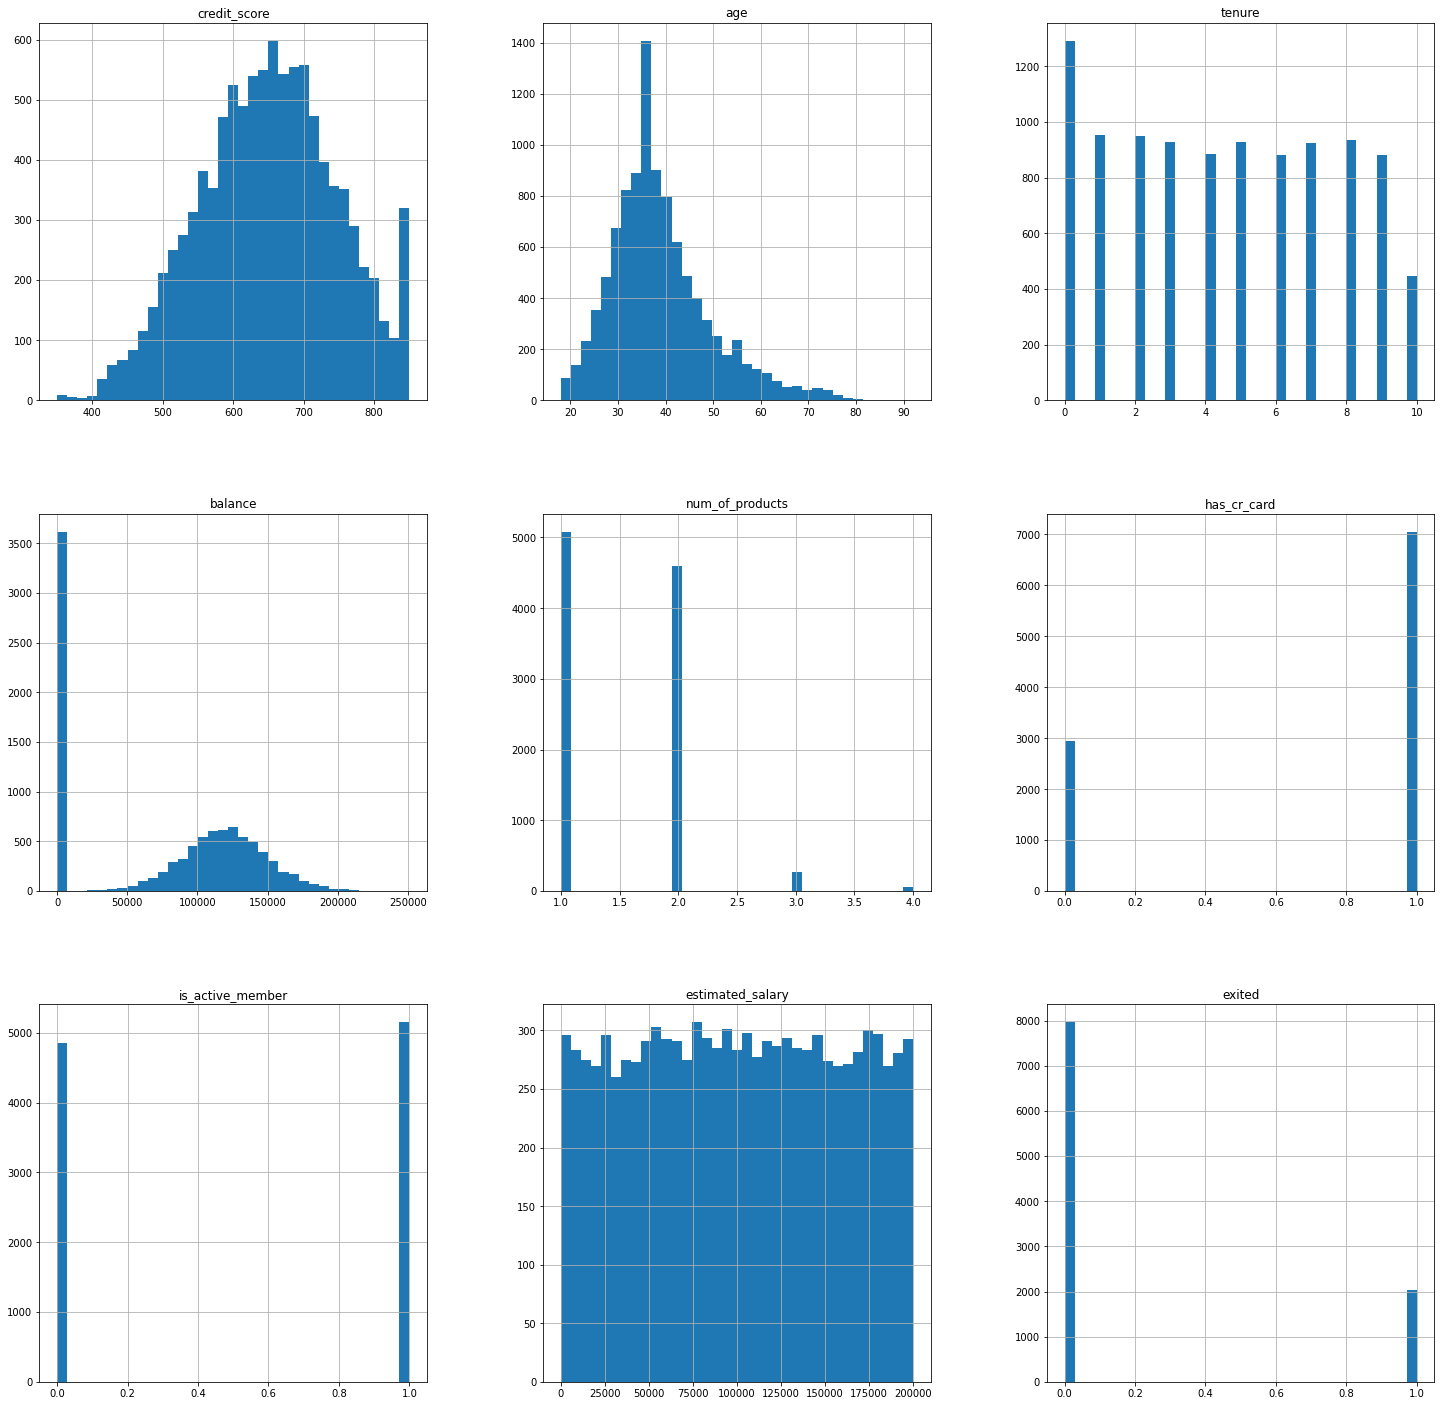

In [18]:
# посмотрим распределения по всем полям
data_del.hist(figsize=(25,25), bins=35)
plt.show()

**<u>Вывод по шагу 1.3</u>**

Мы видим, что в банке почти поровну мужчин и женщин. Средний возраст клиента составляет 38,9 лет, минимальный возраст клиента - 18 лет, максимальный - 92 года. Все укладывается в логику, такой возраст (и максимальный, и минимальный) существуют, в других данных несоответствия не найдены.

## Исследование задачи

### исследование данных

0    7963
1    2037
Name: exited, dtype: int64


<AxesSubplot:title={'center':'Наглядное изображение тех, кто остался, и тех, кто ушел'}>

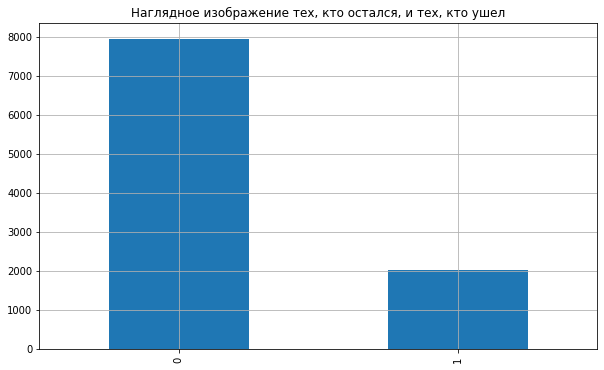

In [19]:
# посморим на данные оставшихся и ушедших клиентов
print(data['exited'].value_counts())
# нарисуем гистограмму значений оттока и оставшихся клиентов
data_del['exited'].value_counts().plot(kind='bar', grid=True, figsize=(10,6), title='Наглядное изображение тех, кто остался, и тех, кто ушел')

Соотношение оттока и тех, кто остался 1:4. Такое соотношение говорит о том, что присутствует дисбаланс в данных.

<AxesSubplot:title={'center':'Зависимость оттока от возраста'}, xlabel='age'>

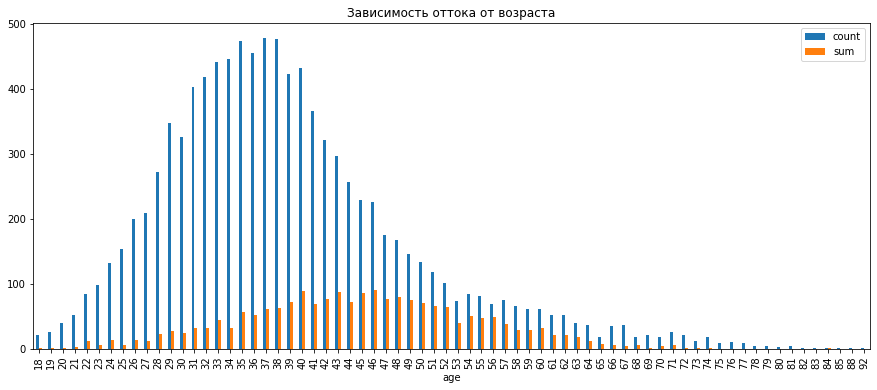

In [20]:
# посмотрим, как зависит возраст и отток клиентов
data_del.groupby('age')['exited'].agg(['count', 'sum']).plot(figsize=(15,6), kind='bar', title='Зависимость оттока от возраста')

<AxesSubplot:title={'center':'Зависимость оттока от количества продуктов'}, xlabel='num_of_products'>

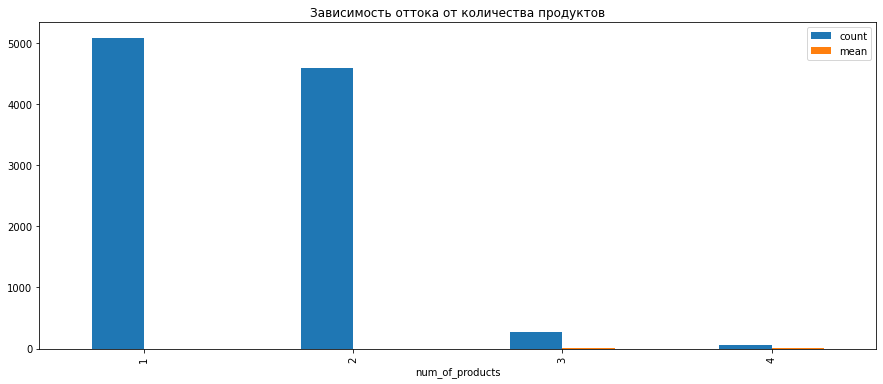

In [21]:
data_del.groupby('num_of_products')['exited'].agg(['count', 'mean']).plot(figsize=(15,6), kind='bar', title='Зависимость оттока от количества продуктов')

<AxesSubplot:title={'center':'Зависимость оттока от наличия кредитной карты'}, xlabel='has_cr_card'>

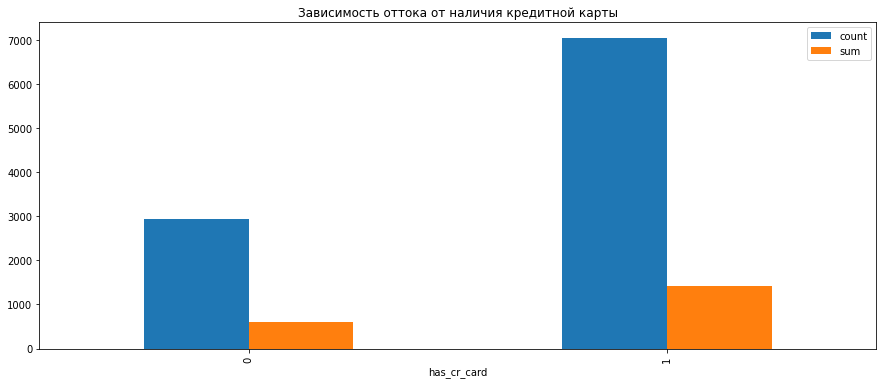

In [22]:
data_del.groupby('has_cr_card')['exited'].agg(['count', 'sum']).plot(figsize=(15,6), kind='bar', title='Зависимость оттока от наличия кредитной карты')

<AxesSubplot:title={'center':'Зависимость оттока от активности клиента'}, xlabel='exited'>

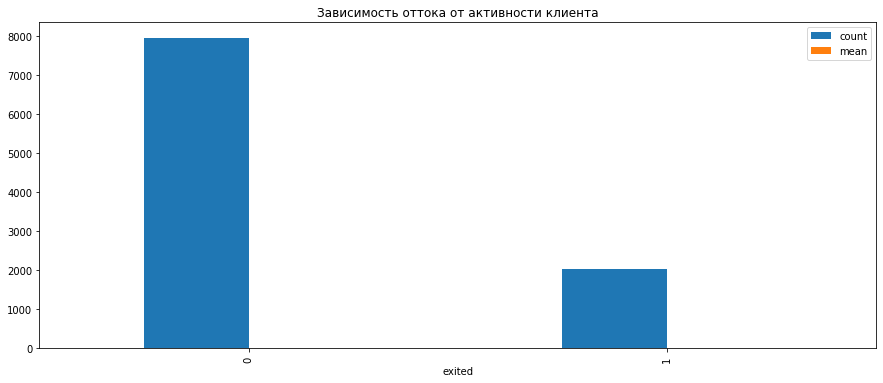

In [23]:
data_del.groupby('exited')['is_active_member'].agg(['count', 'mean']).plot(figsize=(15,6), kind='bar', title='Зависимость оттока от активности клиента')

In [24]:
# посчитаем корреляцию
data_del.corr()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
credit_score,1.000000,-0.003965,0.003087,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
age,-0.003965,1.000000,-0.007368,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
tenure,0.003087,-0.007368,1.000000,-0.005821,0.010106,0.021387,-0.025856,0.011225,-0.013319
balance,0.006268,0.028308,-0.005821,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
num_of_products,0.012238,-0.030680,0.010106,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
has_cr_card,-0.005458,-0.011721,0.021387,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
is_active_member,0.025651,0.085472,-0.025856,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
estimated_salary,-0.001384,-0.007201,0.011225,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
exited,-0.027094,0.285323,-0.013319,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


**<u>Вывод по шагу 2.1</u>**

Видно, что все признаки не сильно коррелируются с целевым признаком. Линейная зависимость не выявлена.

1. Клиенты в возрасте от 39 до 52 уходят чаще. Однако прямой зависимостью это назвать нельзя, так как клиентов в данном возрасте больше, чем в других возрастных группах.
2. Клиенты, у которых всего 1 или два продукта банка уходят чаще.
3. Зависимость оттока от наличия кредитной карты не выявлена.
4. Неактивные клиенты уходят чаще.

### Модель прогнозирования оттока пользователей

За целевой признак берем столбец exited. Остальные столбцы (признаки) помогут нам предсказывать решение по целевому признаку. В нашем случае решается задача классификации, так как определенный нами целевой признак exited - категориальный. Когда категорий всего две (0, 1) речь идёт о бинарной (двоичной) классификации. Построим модель прогнозирования оттока клиентов методами решающего дерева, случайного леса  и логистической регресии.

#### подготовка данных

Пoдготовим данные: выделим целевую переменную и признаки, поделим выборку на обучающую и валидационную.
<div class="alert alert-block alert-warning">
<b>Изменения:</b> поделим выборку на обучающую, валидационную и тестовую.
</div>
Преобразовать категориальные признаки в численные поможет техника прямого кодирования, или отображения (англ. One-Hot Encoding, OHE).

In [25]:
# print(pd.get_dummies(data_del['gender']).head(10))

In [26]:
# применим технику прямого кодирование полей для всего датасета
data_del_ohe = pd.get_dummies(data_del, drop_first=True)
data_del_ohe

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,geography_Germany,geography_Spain,gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [27]:
data_del_ohe.columns

Index(['credit_score', 'age', 'tenure', 'balance', 'num_of_products',
       'has_cr_card', 'is_active_member', 'estimated_salary', 'exited',
       'geography_Germany', 'geography_Spain', 'gender_Male'],
      dtype='object')

In [28]:
# переименуем названия столбцов
data_del_ohe = data_del_ohe.rename(
    columns={'geography_Germany':'geography_germany', 'geography_Spain':'geography_spain', 'gender_Male':'gender_male'})
data_del_ohe.columns

Index(['credit_score', 'age', 'tenure', 'balance', 'num_of_products',
       'has_cr_card', 'is_active_member', 'estimated_salary', 'exited',
       'geography_germany', 'geography_spain', 'gender_male'],
      dtype='object')

In [29]:
# data_train, data_valid = train_test_split(data_del_ohe, test_size=0.25, random_state=12345)

# print('Размер обучающей выборки', data_train.shape[0])
# print('Размер валидационной выборки', data_valid.shape[0])

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> Разобьем выборку по принципу 70/15/15. Так как предыдущий шаг выполнен неверно, я его закомментила, удалять не стала.
</div>

In [30]:
data_train, data_pr = train_test_split(data_del_ohe, test_size=0.30, random_state=12345)
data_valid, data_test = train_test_split(data_pr, test_size=0.5, random_state=12345)

print('Размер обучающей выборки', data_train.shape[0])
print('Размер валидационной выборки', data_valid.shape[0])
print('Размер тестовой выборки', data_test.shape[0])

Размер обучающей выборки 7000
Размер валидационной выборки 1500
Размер тестовой выборки 1500


Составим переменные для признаков и целового признака ('exited') для каждой выборки.

In [31]:
features_train = data_train.drop(['exited'], axis=1) # признак
target_train = data_train['exited'] # целевой признак
features_valid = data_valid.drop(['exited'], axis=1) # признак
target_valid = data_valid['exited'] # целевой признак
features_test = data_test.drop(['exited'], axis=1) # признак
target_test = data_test['exited'] # целевой признак

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Были внесены следующие изменения: в код добавлены новые переменные для тестовой выборки - features_test и target_test.
</div>

У признаков разный масштаб. Необходимо их стандартизировать.

In [32]:
numeric = ['credit_score', 'balance', 'estimated_salary']
scaler = StandardScaler()
scaler.fit(features_train[numeric]) 
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

**<u>Вывод по шагу 2.2.1</u>**

Пoдготовлены данные: выделены целевая переменная и признаки, выборка разделена на обучающую и валидационную, признаки стандартизированы.

#### Обучаем модель дерево решений.

In [33]:
for depth in range(1, 20):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth) # объявляем модель с заданной глубиной дерева
    model.fit(features_train, target_train) # обучение модели
    predictions_valid = model.predict(features_valid) # получение предсказания модели
    result = accuracy_score(target_valid, predictions_valid) # считаем качество модели
    print('Глубина дерева', depth, 'Точность', result, 'F1', f1_score(target_valid, predictions_valid))

Глубина дерева 1 Точность 0.7953333333333333 F1 0.0
Глубина дерева 2 Точность 0.8246666666666667 F1 0.5191956124314443
Глубина дерева 3 Точность 0.8453333333333334 F1 0.4678899082568807
Глубина дерева 4 Точность 0.8506666666666667 F1 0.4954954954954955
Глубина дерева 5 Точность 0.8533333333333334 F1 0.5634920634920635
Глубина дерева 6 Точность 0.864 F1 0.5545851528384279
Глубина дерева 7 Точность 0.8573333333333333 F1 0.5578512396694214
Глубина дерева 8 Точность 0.8493333333333334 F1 0.5170940170940171
Глубина дерева 9 Точность 0.842 F1 0.5343811394891946
Глубина дерева 10 Точность 0.8426666666666667 F1 0.5645756457564577
Глубина дерева 11 Точность 0.8326666666666667 F1 0.5477477477477477
Глубина дерева 12 Точность 0.8346666666666667 F1 0.5539568345323742
Глубина дерева 13 Точность 0.8246666666666667 F1 0.5377855887521968
Глубина дерева 14 Точность 0.8093333333333333 F1 0.5201342281879195
Глубина дерева 15 Точность 0.8026666666666666 F1 0.5066666666666667
Глубина дерева 16 Точность 0.8

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> посчитаем ROC-AUC.
</div>

In [34]:
model = DecisionTreeClassifier(random_state=12345)
model.fit(features_train, target_train)

probabilities_valid=model.predict_proba(features_valid)
probabilities_one_valid=probabilities_valid[:,1]
fpr_tree,tpr_tree,thresholds=roc_curve(target_valid,probabilities_one_valid)

auc_roc=roc_auc_score(target_valid,probabilities_one_valid)

auc_roc

0.6854329407974313

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> Вывод: лучшее значение max_depth = 10, при котором F1 = 0.564, ROC-AUC = 0.685
</div>

#### Обучаем модель случайный лес.

In [35]:
# подберем циклом лучший параметр max_depth.
for max_depth in range(1, 80):
    model = RandomForestClassifier(max_depth=max_depth, random_state=12345, n_estimators=80) # объявляем модель 
    model.fit(features_train, target_train) # обучение модель на тренировочной выборке
    predictions_valid = model.predict(features_valid) # получение предсказания модели
    result = accuracy_score(target_valid, predictions_valid) # посчитаем качество модели на валидационной выборке
    print('max_depth', max_depth, 'Точность', result, 'F1', f1_score(target_valid, predictions_valid))

max_depth 1 Точность 0.7953333333333333 F1 0.0
max_depth 2 Точность 0.812 F1 0.15568862275449102
max_depth 3 Точность 0.818 F1 0.2177650429799427
max_depth 4 Точность 0.8366666666666667 F1 0.38287153652392947
max_depth 5 Точность 0.8513333333333334 F1 0.48735632183908045
max_depth 6 Точность 0.8593333333333333 F1 0.5279642058165548
max_depth 7 Точность 0.8673333333333333 F1 0.5664488017429193
max_depth 8 Точность 0.8653333333333333 F1 0.5646551724137931
max_depth 9 Точность 0.866 F1 0.5714285714285714
max_depth 10 Точность 0.8653333333333333 F1 0.5720338983050848
max_depth 11 Точность 0.8633333333333333 F1 0.570230607966457
max_depth 12 Точность 0.8666666666666667 F1 0.5867768595041322
max_depth 13 Точность 0.8646666666666667 F1 0.5865580448065173
max_depth 14 Точность 0.8673333333333333 F1 0.5930470347648261
max_depth 15 Точность 0.8653333333333333 F1 0.5877551020408163
max_depth 16 Точность 0.864 F1 0.5903614457831325
max_depth 17 Точность 0.862 F1 0.5851703406813626
max_depth 18 Точ

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> посчитаем ROC_AUC.
</div>

In [36]:
model = RandomForestClassifier(random_state=12345)
model.fit(features_train, target_train)

probabilities_valid=model.predict_proba(features_valid)
probabilities_one_valid=probabilities_valid[:,1]
fpr_forest,tpr_forest,thresholds=roc_curve(target_valid,probabilities_one_valid)

auc_roc=roc_auc_score(target_valid,probabilities_one_valid)

auc_roc

0.8470871069294009

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Были внесены следующие изменения Вывод: лучшее значение max_depth = 14, при котором F1 = 0.593, ROC_AUC = 0.847.
</div>

In [37]:
# подбираем циклом гиперпараметр n_estimators (количество деревьев).
for est in range(1, 55, 1):
    model = RandomForestClassifier(max_depth=14, random_state=12345, n_estimators=est) # объявляем модель с заданным количеством деревьев
    model.fit(features_train, target_train) # обучение модель на тренировочной выборке
    predictions_valid = model.predict(features_valid) # получение предсказания модели
    result = accuracy_score(target_valid, predictions_valid) # посчитаем качество модели на валидационной выборке
    print('Количество деревьев', est, 'Точность', result, 'F1', f1_score(target_valid, predictions_valid))

Количество деревьев 1 Точность 0.8053333333333333 F1 0.4930555555555556
Количество деревьев 2 Точность 0.818 F1 0.46783625730994155
Количество деревьев 3 Точность 0.8373333333333334 F1 0.5307692307692308
Количество деревьев 4 Точность 0.8406666666666667 F1 0.5248508946322067
Количество деревьев 5 Точность 0.8466666666666667 F1 0.5472440944881889
Количество деревьев 6 Точность 0.848 F1 0.5384615384615385
Количество деревьев 7 Точность 0.848 F1 0.5421686746987951
Количество деревьев 8 Точность 0.8486666666666667 F1 0.5414141414141415
Количество деревьев 9 Точность 0.8493333333333334 F1 0.5461847389558232
Количество деревьев 10 Точность 0.8486666666666667 F1 0.5432595573440643
Количество деревьев 11 Точность 0.852 F1 0.5469387755102041
Количество деревьев 12 Точность 0.8526666666666667 F1 0.5443298969072166
Количество деревьев 13 Точность 0.858 F1 0.5696969696969697
Количество деревьев 14 Точность 0.8586666666666667 F1 0.5691056910569106
Количество деревьев 15 Точность 0.8566666666666667 

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Были внесены следующие изменения: Вывод: лучшее значение max_depth = 14, и n_estimators = 46, при котором F1 = 0.598, ROC_AUC = 0.847. F1 увеличилась.
</div>

#### Обучение с помощью модели Логистической регрессии.

In [38]:
model = LogisticRegression() # объявляем модель с заданным количеством итераций
model.fit(features_train, target_train) # обучение модель на тренировочной выборке
predictions_valid = model.predict(features_valid) # получение предсказания модели
result = accuracy_score(target_valid, predictions_valid) # посчитаем качество модели на валидационной выборке
print('Точность', result, 'F1', f1_score(target_valid, predictions_valid))

Точность 0.8073333333333333 F1 0.31999999999999995


In [39]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr_log,tpr_log,thresholds=roc_curve(target_valid,probabilities_one_valid)

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print(auc_roc)

0.7745043699539388


<div class="alert alert-block alert-warning">
<b>Изменения:</b> Были внесены следующие изменения: Вывод: F1 = 0,319. ROC_AUC = 0.774.
</div>

**<u>Вывод по шагу 2.2</u>**

Были рассмотрены данные с дисбалансом, данные были стандартизированы.
Среди трех моделей можно сделать вывод ,что самая лучшая модель оказалась модель случайного леса при max_depth = 21, n_estimators = 47 и F1 = 0.586.

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Были рассмотрены данные с дисбалансом, данные были стандартизированы.
Среди трех моделей можно сделать вывод ,что самая лучшая модель оказалась модель случайного леса при max_depth = 14, n_estimators = 46 и F1 = 0.598. ROC_AUC = 0.847.
</div>

## Борьба с дисбалансом

Алгоритмы машинного обучения считают все объекты обучающей выборки равнозначными по умолчанию. 

В нашей задаче наблюдается явный дисбаланс и есть три пути решения этой проблемы:

- Upsampling.
- Downsampling.
- Добавить в модель параметр class_weight.

Рассмотрим эти 3 способа.

### Upsampling

Воспользуемся функцией Upsampling и увеличим количество клиентов оттока (target == 1)

In [40]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345) # перемешаем строки
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

model = RandomForestClassifier(random_state=12345)
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)

print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.6115107913669066


### Downsampling

In [41]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.268)

model = RandomForestClassifier(random_state=12345)
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)

print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.5780645161290323


In [42]:
target_downsampled.value_counts()

0    1498
1    1411
Name: exited, dtype: int64

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> Согласно рекомендациям избавляемся от дисбаланса: использован такой fraction, который устраняет дисбаланс. Проверили через target_downsampled.value_counts()
</div>

### Балансировка весов классов

In [43]:
# инициируем модель логистической регрессии
model_log_balanced = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')

In [44]:
# обучим модель
model_log_balanced.fit(features_train, target_train)

LogisticRegression(class_weight='balanced', random_state=12345,
                   solver='liblinear')

In [45]:
# спрогнозируем целевой параметр
predicted_valid_balanced = model_log_balanced.predict(features_valid)

In [46]:
# получим критерий f1
f1_score(predicted_valid_balanced, target_valid)

0.5039370078740157

Опробован альтернативный вариант балансировки классов.

**<u>Вывод по шагу 3</u>**:

Количество данных не так много, принято решение не пользоваться методом уменьшения выборки (Downsampling). Будем использовать Upsampling.

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> здесь также посчитаем ROC_AUC
</div>

In [47]:
model = RandomForestClassifier(random_state=12345)
model.fit(features_upsampled, target_upsampled)

probabilities_valid=model.predict_proba(features_valid)
probabilities_one_valid=probabilities_valid[:,1]
fpr_forest,tpr_forest,thresholds=roc_curve(target_valid,probabilities_one_valid)

auc_roc=roc_auc_score(target_valid,probabilities_one_valid)

auc_roc

0.8431362644743633

In [48]:
model = RandomForestClassifier(random_state=12345)
model.fit(features_downsampled, target_downsampled)

probabilities_valid=model.predict_proba(features_valid)
probabilities_one_valid=probabilities_valid[:,1]
fpr_forest,tpr_forest,thresholds=roc_curve(target_valid,probabilities_one_valid)

auc_roc=roc_auc_score(target_valid,probabilities_one_valid)

auc_roc

0.8448263622488402

In [49]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_upsampled, target_upsampled)

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr_log,tpr_log,thresholds=roc_curve(target_valid,probabilities_one_valid)

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print(auc_roc)

0.7790504326268051


## Тестирование модели

Обучение с помощью модели Решающее дерево (после балансирования данных).

In [50]:
%%time

model = DecisionTreeClassifier(random_state=12345)
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)

print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.49328859060402686
CPU times: user 94.7 ms, sys: 20.3 ms, total: 115 ms
Wall time: 132 ms


Обучение с помощью модели случайный лес (после балансирования данных).

In [51]:
%%time

model = RandomForestClassifier(random_state=12345)
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)

print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.6115107913669066
CPU times: user 1.23 s, sys: 0 ns, total: 1.23 s
Wall time: 1.24 s


Обучение с помощью модели логистическая регрессия (после балансирования данных).

In [52]:
%%time

model = LogisticRegression(random_state=12345)
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)

print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.5
CPU times: user 1.68 s, sys: 2.71 s, total: 4.39 s
Wall time: 4.33 s


**Вывод**: самый лучший результат на сбалансированных данных (как и на данных с дисбалансом), показала модель случайного леса (F1 = 0,604).

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> оценим нашу модель на независимой выборке (тестовой). Посчитаем для нее f1, roc_auc
</div>

In [53]:
%%time

model = RandomForestClassifier(random_state=12345)
model.fit(features_upsampled, target_upsampled)
predicted_test = model.predict(features_test)

print("F1:", f1_score(target_test, predicted_test))

F1: 0.59552495697074
CPU times: user 1.24 s, sys: 35.9 ms, total: 1.28 s
Wall time: 1.29 s


In [54]:
model = RandomForestClassifier(random_state=12345)
model.fit(features_upsampled, target_upsampled)

probabilities_test=model.predict_proba(features_test)
probabilities_one_test=probabilities_test[:,1]
fpr_forest,tpr_forest,thresholds=roc_curve(target_test,probabilities_one_test)

auc_roc=roc_auc_score(target_test,probabilities_one_test)

auc_roc

0.8470360116685556

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> Вывод: на тестовой выборке значение F1 модели случайный лес составляет 0.595, ROC_AUC = 0.847.
</div>

Чтобы выявить, как сильно наша модель отличается от случайной, посчитаем площадь под ROC-кривой — AUC-ROC (от англ. Area Under Curve ROC, «площадь под ROC-кривой»). Это новая метрика качества, которая изменяется от 0 до 1. AUC-ROC случайной модели равна 0.5.

In [55]:
model = DecisionTreeClassifier(random_state=12345)
model.fit(features_upsampled, target_upsampled)

probabilities_valid=model.predict_proba(features_valid)
probabilities_one_valid=probabilities_valid[:,1]
fpr_tree,tpr_tree,thresholds=roc_curve(target_valid,probabilities_one_valid)

auc_roc=roc_auc_score(target_valid,probabilities_one_valid)

auc_roc

0.6798998501027983

In [56]:
model = RandomForestClassifier(random_state=12345)
model.fit(features_upsampled, target_upsampled)

probabilities_valid=model.predict_proba(features_valid)
probabilities_one_valid=probabilities_valid[:,1]
fpr_forest,tpr_forest,thresholds=roc_curve(target_valid,probabilities_one_valid)

auc_roc=roc_auc_score(target_valid,probabilities_one_valid)

auc_roc

0.8431362644743633

In [57]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_upsampled, target_upsampled)

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr_log,tpr_log,thresholds=roc_curve(target_valid,probabilities_one_valid)

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print(auc_roc)

0.7790504326268051


<Figure size 432x288 with 0 Axes>

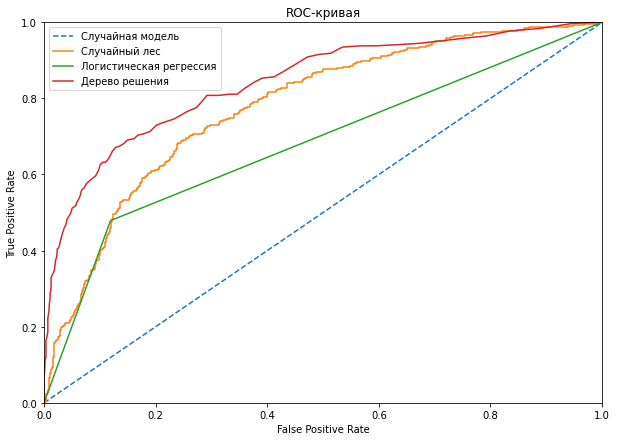

In [58]:
plt.figure()

plt.figure(figsize=(10,7))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot(fpr_log,tpr_log)
plt.plot(fpr_tree,tpr_tree)
plt.plot(fpr_forest,tpr_forest)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(('Случайная модель','Случайный лес','Логистическая регрессия','Дерево решения'),
           loc= 'upper left') 
plt.show()

Лучшее значение метрики auc roc=0.850 у модели Случайный лес

<Figure size 432x288 with 0 Axes>

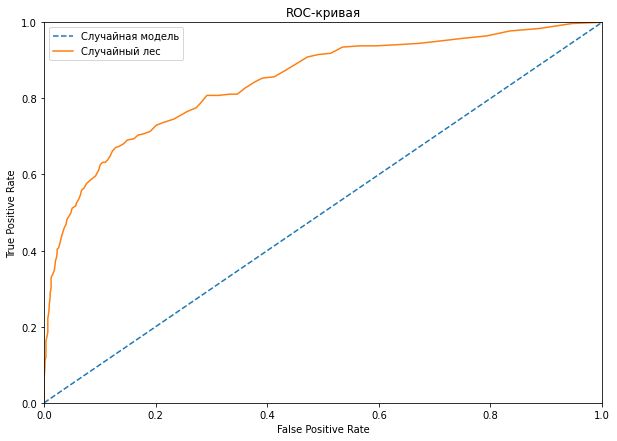

In [59]:
plt.figure()

plt.figure(figsize=(10,7))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot(fpr_forest,tpr_forest)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(('Случайная модель','Случайный лес'),
           loc= 'upper left') 
plt.show()

**<u>Вывод по шагу 4</u>**. 

Рассматривая данные после балансирования данных между тремя моделями можно сделать вывод, что самая лучшая модель оказалась Случайный лес: мы имеем F1 меру = 0,595 на тестовой выборке, ROC_AUC = 0.847.

# Общий вывод

Проведено построение модели по прогнозированию оттока клиентов банка на основе исторических данных поведения клиентов.

В процессе предобработки данных:

1. была произведена замена наименований столбцов на нижний регистр, применен змеиный стиль.
2. тип данных столбца tenure приведен к типу данных Int64.
3. пропуски в столбце tenure заменены на 0.
4. удалены не нужные для анализа столбцы: row_number, customer_id, surname.
5. дубликаты отсутствуют.
6. проанализированы выбросы.

В процессе исследования данных:

1. Признаки не сильно коррелируются с целевым признаком. Линейная зависимость не выявлена.
2. Клиенты в возрасте от 39 до 52 уходят чаще. Однако прямой зависимостью это назвать нельзя, так как клиентов в данном возрасте больше, чем в других возрастных группах.
3. Клиенты, у которых всего 1 или два продукта банка уходят чаще.
4. Зависимость оттока от наличия кредитной карты не выявлена.
5. Неактивные клиенты уходят чаще.
6. Категориальные признаки переведены в дамми переменные.

Для борьбы с дисбалансом использована техника upsampling. Поэтому для дальнейшего прогноза были использованы данные features_upsampled, target_upsampled полученные с помощью техники upsampling.

Проведен выбор лучшей модели для дальнейшего прогнозирования. Проанализированы модели LogisticRegression, DecisionTreeClassifier, RandomForestClassifier.

Рассматривая данные после балансирования данных между тремя моделями можно сделать вывод, что самая лучшая модель оказалась Случайный лес: мы имеем F1 меру = 0,604 на тестовой(валидной) выборке.
<div class="alert alert-block alert-warning">
<b>Изменения:</b> Были внесены следующие изменения Рассматривая данные после балансирования данных между тремя моделями можно сделать вывод, что самая лучшая модель оказалась Случайный лес: мы имеем F1 меру = 0,595 на тестовой выборке. Дополнительно построена ROC - кривая, и измерена AUC-ROC = 0.843 у модели Случайный лес.
</div>